In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import Sequential
from tensorflow.keras.activations import linear, relu, sigmoid,softmax
from tensorflow.keras.losses import BinaryCrossentropy,SparseCategoricalCrossentropy,MeanSquaredError
from tensorflow.keras.optimizers import Adam

In [8]:
#load data
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test)=mnist.load_data()

11490434/11490434 [==============================] - 81s 7us/step


In [9]:
#normalizing of input 
x_train, x_test = x_train / 255.0, x_test / 255.0
#or 
#x_train = tf.keras.utils.normalize(x_train, axis=1)
#x_test = tf.keras.utils.normalize(x_test, axis=1)

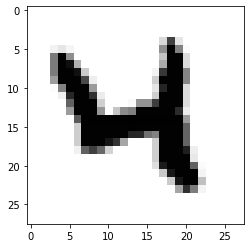

4


In [10]:

plt.imshow(x_train[20],cmap=plt.cm.binary)
plt.show()
print(y_train[20])

In [11]:
model=Sequential()

In [12]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=10,activation='softmax'))


In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2396 - accuracy: 0.9304
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0994 - accuracy: 0.9692
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0691 - accuracy: 0.9783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0527 - accuracy: 0.9835
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0417 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0344 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0285 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0235 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0214 - accuracy: 0.9927
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.019

In [15]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.1025 - accuracy: 0.9743
0.10250896215438843
0.9743000268936157


In [25]:
model.save('kerasNN.model')

INFO:tensorflow:Assets written to: kerasNN.model\assets


In [26]:
new_model = tf.keras.models.load_model('kerasNN.model')
predictions = new_model.predict(x_test)
print(predictions)

313/313 [==============================] - 0s 1ms/step
[[2.7446914e-13 1.7703486e-10 2.6761321e-11 ... 9.9999928e-01
  2.7361506e-13 7.1436119e-07]
 [2.7201504e-14 4.1595353e-08 1.0000000e+00 ... 2.1024275e-13
  3.0307152e-12 1.1479755e-16]
 [2.5257855e-11 9.9999821e-01 6.5369665e-09 ... 1.7211013e-07
  5.3024493e-08 6.4699957e-09]
 ...
 [2.8137057e-18 2.8019920e-15 4.3213906e-15 ... 1.1998073e-12
  3.2885709e-14 1.8004467e-09]
 [2.9392057e-13 3.0171330e-19 3.7080754e-14 ... 6.8436694e-16
  2.6604665e-09 2.2747210e-15]
 [1.0935432e-17 2.8963729e-19 9.4895533e-21 ... 2.6733411e-24
  2.2940994e-13 1.8011648e-20]]


6


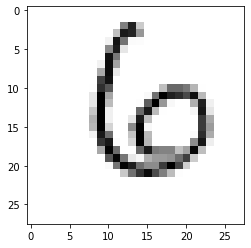

In [28]:
print(np.argmax(predictions[100]))
plt.imshow(x_test[100],cmap=plt.cm.binary)
plt.show()